In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('hospital_readmissions.csv')
df.head()

age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med  \
0  Respiratory        Other           no      no     no          yes   
1        Other        Other           no      no     no          yes   
2  Circulatory  Circulatory           no      no    yes          yes   
3        Other     Diabetes           no      no    yes          yes   
4  Circulatory  Respiratory           no      no     no          yes   

  readmitted  
0         no  
1         no  
2        yes  
3        yes  
4         no

In [3]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [4]:
df.shape

(25000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
df.rename(columns= {'diag_1': 'primary_diagnosis', 'diag_2':'sec_diagnosis','diag_3':'additional_sec_diagnosis','change':'med_change','A1Ctest':'HDA1Ctest'}, inplace= True)

In [7]:
print(df['age'].unique())

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']


In [8]:
df['Age_Category'] = df['age'].replace({'[70-80)':'senior','[50-60)':'late_middle_age','[60-70)': 'mid_old_age','[40-50)':'early_mid_age','[80-90)':'very_senior_old_age','[90-100)':'centenarian'})

In [9]:
df['Age_Category'] = df['Age_Category'].astype('category')
print(df[['Age_Category', 'age']])

              Age_Category      age
0                   senior  [70-80)
1                   senior  [70-80)
2          late_middle_age  [50-60)
3                   senior  [70-80)
4              mid_old_age  [60-70)
...                    ...      ...
24995  very_senior_old_age  [80-90)
24996  very_senior_old_age  [80-90)
24997               senior  [70-80)
24998               senior  [70-80)
24999      late_middle_age  [50-60)

[25000 rows x 2 columns]


In [10]:
df['Age_Category'].unique()

['senior', 'late_middle_age', 'mid_old_age', 'early_mid_age', 'very_senior_old_age', 'centenarian']
Categories (6, object): ['centenarian', 'early_mid_age', 'late_middle_age', 'mid_old_age', 'senior', 'very_senior_old_age']

In [11]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'primary_diagnosis', 'sec_diagnosis',
       'additional_sec_diagnosis', 'glucose_test', 'HDA1Ctest', 'med_change',
       'diabetes_med', 'readmitted', 'Age_Category'],
      dtype='object')

In [12]:
cols_cat = [
    'medical_specialty', 'primary_diagnosis', 'sec_diagnosis',
    'additional_sec_diagnosis', 'glucose_test', 'HDA1Ctest',
    'med_change', 'diabetes_med', 'readmitted'
]

for col in cols_cat:
    df[col] = df[col].astype('category')

print(df.dtypes)

age                           object
time_in_hospital               int64
n_lab_procedures               int64
n_procedures                   int64
n_medications                  int64
n_outpatient                   int64
n_inpatient                    int64
n_emergency                    int64
medical_specialty           category
primary_diagnosis           category
sec_diagnosis               category
additional_sec_diagnosis    category
glucose_test                category
HDA1Ctest                   category
med_change                  category
diabetes_med                category
readmitted                  category
Age_Category                category
dtype: object


In [13]:
df.drop(columns=['age'], inplace=True)

In [14]:
# handling missing values
df.isnull().sum()

time_in_hospital            0
n_lab_procedures            0
n_procedures                0
n_medications               0
n_outpatient                0
n_inpatient                 0
n_emergency                 0
medical_specialty           0
primary_diagnosis           0
sec_diagnosis               0
additional_sec_diagnosis    0
glucose_test                0
HDA1Ctest                   0
med_change                  0
diabetes_med                0
readmitted                  0
Age_Category                0
dtype: int64

- There are no missing values.

In [15]:
#checking for duplicates
df.duplicated().sum()

0

In [16]:
# checking for inconsistent date
cols= df.columns
for c in cols:
    print(c)
    print(df[c].unique())

time_in_hospital
[ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
n_lab_procedures
[ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
n_procedures
[1 2 0 6 3 5 4]
n_medications
[18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
n_outpatient
[ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]
n_inpatient
[ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]
n_emergency
[ 0  1 10  2  3  4  5  7  6 12  8 16 28 18 11  9 37 21 13 19 64

### Data Cleaning Analysis 
The data contained 25000 rows and 17 rows.
- There were not missing or duplicated values.
- The columns; diag_1,diag_2,diag_3,A1Ctest,change were renamed to primary_diagnosis,sec_diagnosis,additional_sec_diagnosis,HDA1Ctest,med_change respectively.
- For column , age the categorization was wrongly done. However, they were categorized into 'senior', 'late_middle_age', 'mid_old_age', 'early_mid_age', 'very_senior_old_age', 'centenarian'.
- The data type for all category columns was conversted into datatype 'category'.

At the end there were still 25000 rows and 17 columns.

### EDA

In [17]:
# statistical summary for numeric columns
df.describe()

time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      1.000000      0.000000  
max       33.000000     15.000000     64.000000

In [18]:
# Describing the categorical columns too
#unique values and frequency, top values in each category
df.describe(exclude= [np.number])

medical_specialty primary_diagnosis sec_diagnosis  \
count              25000             25000         25000   
unique                 7                 8             8   
top              Missing       Circulatory         Other   
freq               12382              7824          9056   

       additional_sec_diagnosis glucose_test HDA1Ctest med_change  \
count                     25000        25000     25000      25000   
unique                        8            3         3          2   
top                       Other           no        no         no   
freq                       9107        23625     20938      13497   

       diabetes_med readmitted Age_Category  
count         25000      25000        25000  
unique            2          2            6  
top             yes         no       senior  
freq          19228      13246         6837

#### Visulaization to show distribution for categorical columns

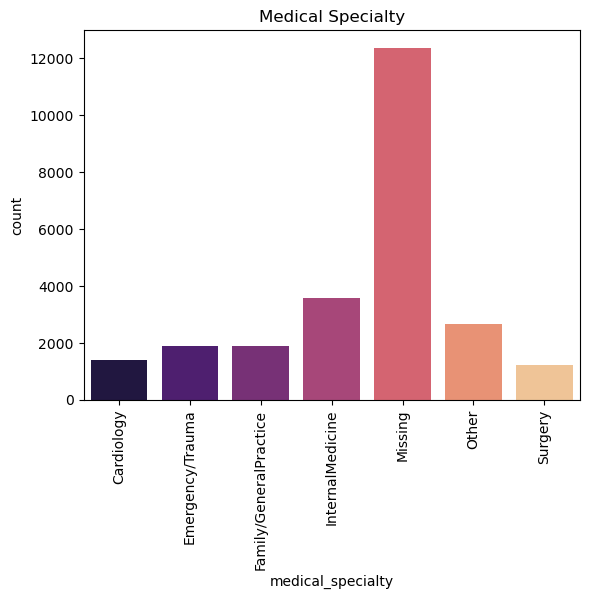

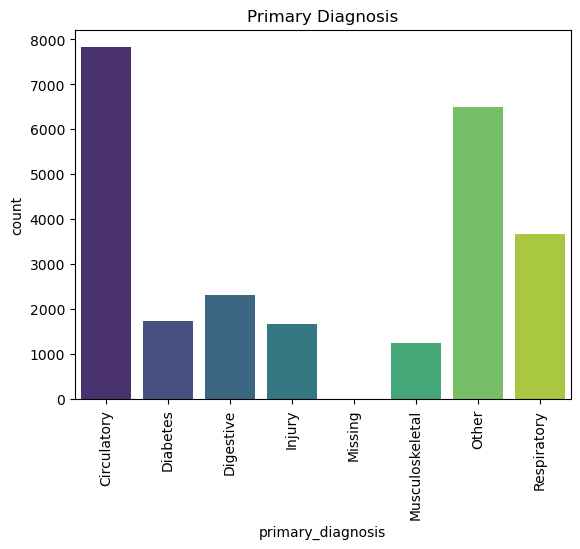

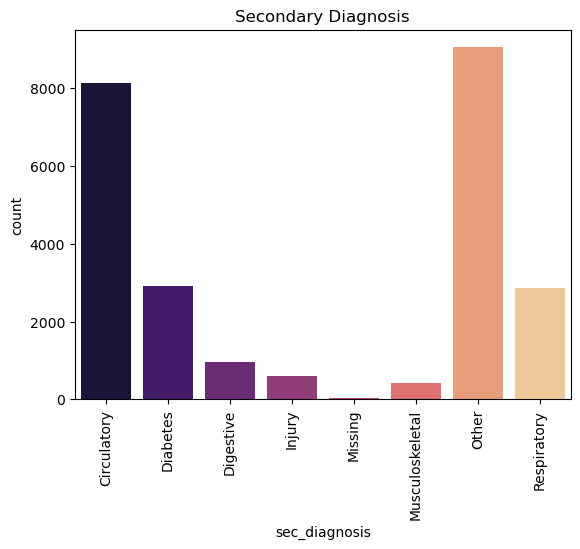

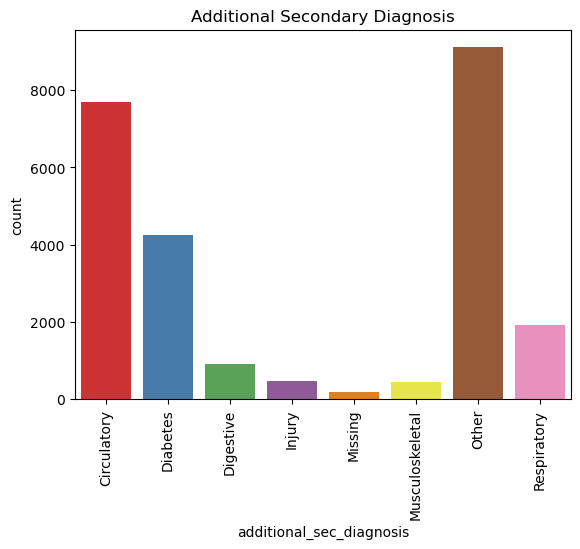

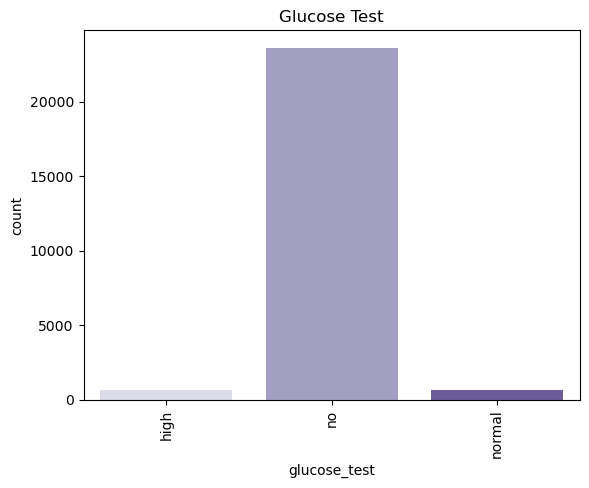

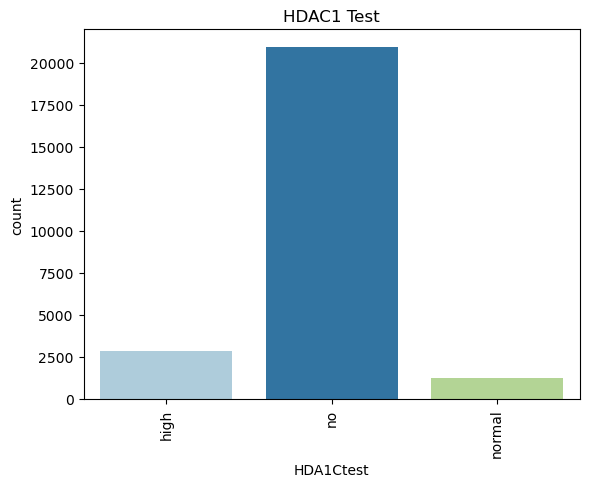

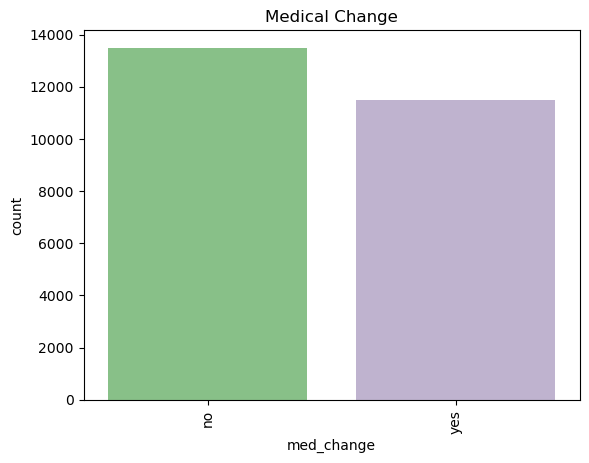

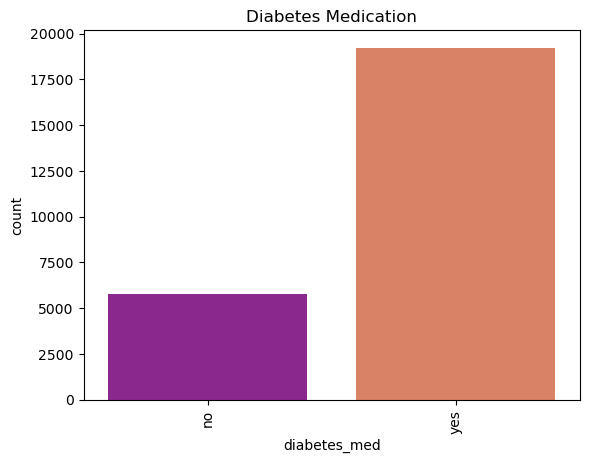

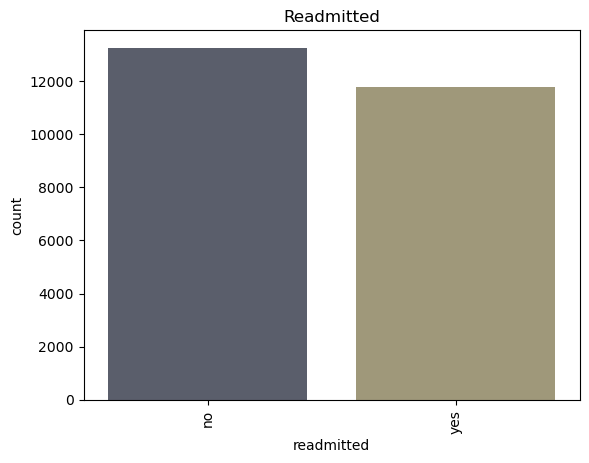

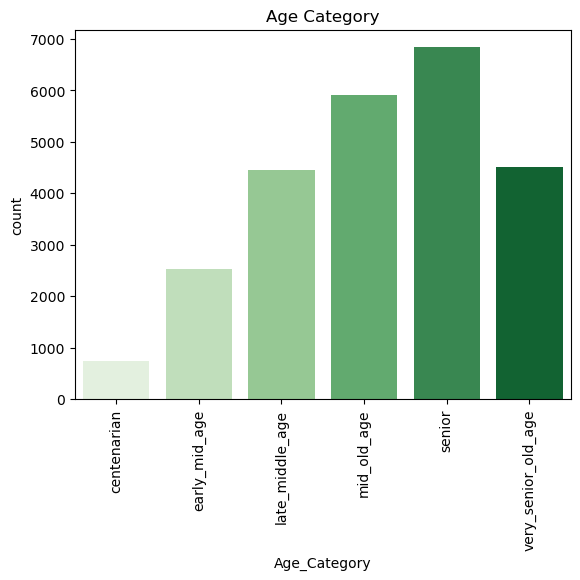

In [19]:
sns.countplot(data=df, x="medical_specialty", palette="magma", hue="medical_specialty", legend=False )
plt.xticks(rotation=90) 
plt.title('Medical Specialty')
plt.show()

sns.countplot(data=df, x="primary_diagnosis", palette="viridis", hue="primary_diagnosis", legend=False)
plt.xticks(rotation=90) 
plt.title('Primary Diagnosis')
plt.show()

sns.countplot(data=df, x="sec_diagnosis", palette="magma",hue="sec_diagnosis", legend=False)
plt.xticks(rotation=90) 
plt.title('Secondary Diagnosis')
plt.show()

sns.countplot(data=df, x="additional_sec_diagnosis", palette="Set1", hue="additional_sec_diagnosis", legend=False)
plt.xticks(rotation=90)
plt.title('Additional Secondary Diagnosis')
plt.show()

sns.countplot(data=df, x="glucose_test", palette="Purples", hue="glucose_test", legend=False)
plt.xticks(rotation=90)
plt.title('Glucose Test')
plt.show()

sns.countplot(data=df, x="HDA1Ctest", palette="Paired", hue="HDA1Ctest", legend=False)
plt.xticks(rotation=90)
plt.title('HDAC1 Test')
plt.show()

sns.countplot(data=df, x="med_change", palette="Accent", hue="med_change", legend=False)
plt.xticks(rotation=90)
plt.title('Medical Change')
plt.show()

sns.countplot(data=df, x="diabetes_med", palette="plasma", hue="diabetes_med", legend=False)
plt.xticks(rotation=90)
plt.title('Diabetes Medication')
plt.show()

sns.countplot(data=df, x="readmitted", palette="cividis", hue="readmitted", legend=False)
plt.xticks(rotation=90)
plt.title('Readmitted')
plt.show()

sns.countplot(data=df, x="Age_Category", palette="Greens", hue="Age_Category", legend=False)
plt.xticks(rotation=90)
plt.title('Age Category')
plt.show()

### Target Variable


In [20]:
df['readmitted'].value_counts()

no     13246
yes    11754
Name: readmitted, dtype: int64

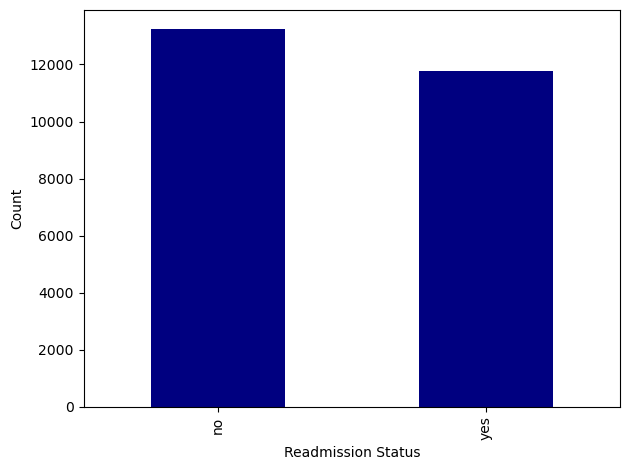

In [21]:
df['readmitted'].value_counts().plot(kind='bar', color="navy")
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [22]:
# percentage of the readmitted or not readmitted 
df['readmitted'].value_counts(normalize=True)*100

no     52.984
yes    47.016
Name: readmitted, dtype: float64

### Relationship Analysis

- Analyzing data using other features against teh target variable to derive more insights.

#### Univariate Analysis

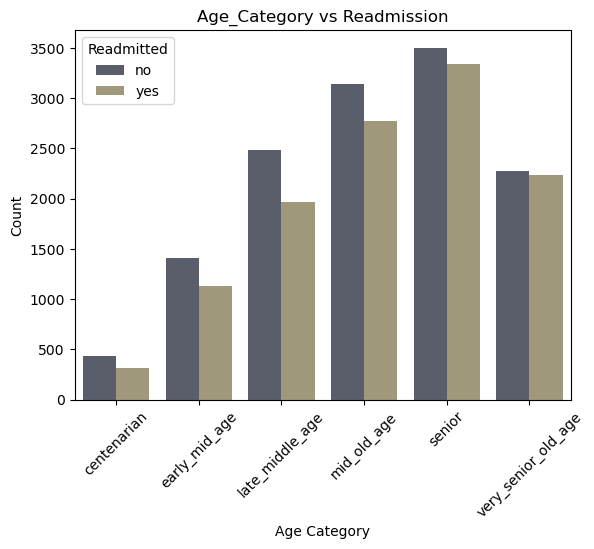

In [23]:
sns.countplot(data=df, x="Age_Category", hue="readmitted", palette="cividis")
plt.title("Age_Category vs Readmission")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Readmitted")
plt.xticks(rotation=45)
plt.show()

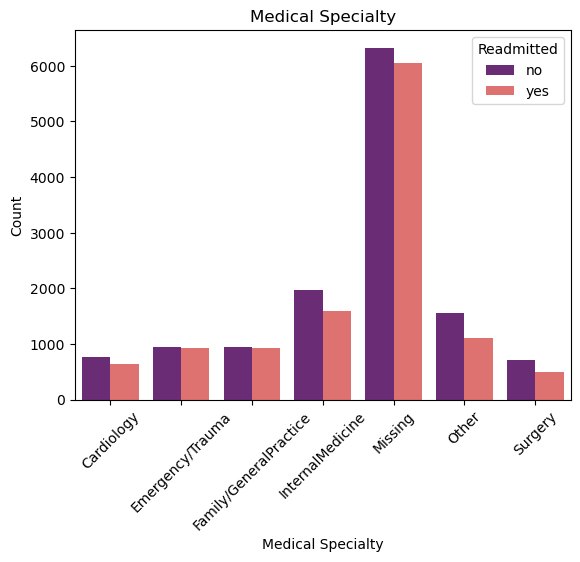

In [24]:
sns.countplot(data=df, x="medical_specialty", palette="magma", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('Medical Specialty')
plt.legend(title='Readmitted')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.show()

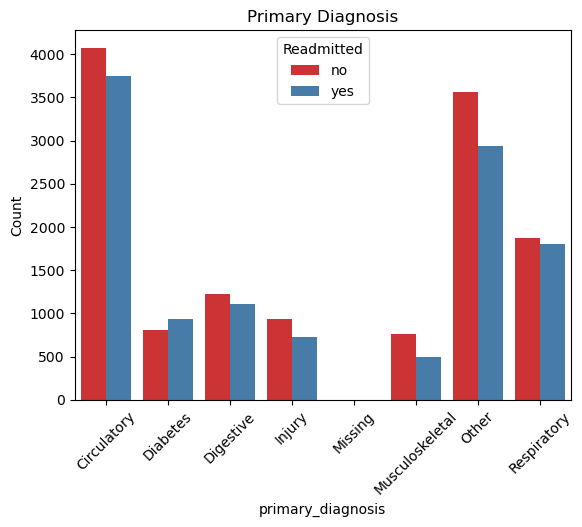

In [25]:
sns.countplot(data=df, x="primary_diagnosis", palette="Set1", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('Primary Diagnosis')
plt.legend(title='Readmitted')
plt.xlabel('primary_diagnosis')
plt.ylabel('Count')
plt.show()

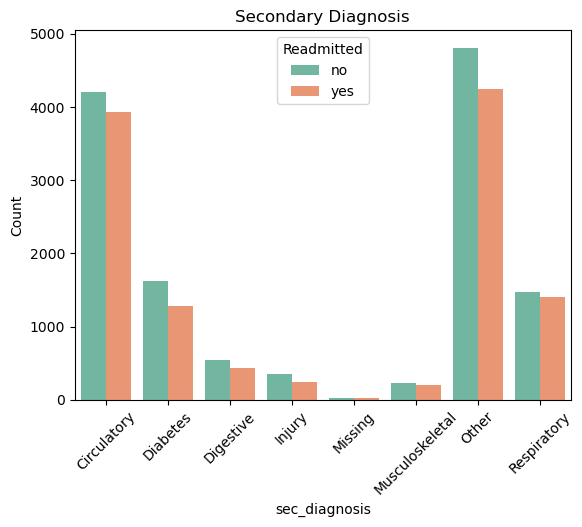

In [26]:
sns.countplot(data=df, x="sec_diagnosis", palette="Set2", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('Secondary Diagnosis')
plt.legend(title='Readmitted')
plt.xlabel('sec_diagnosis')
plt.ylabel('Count')
plt.show()

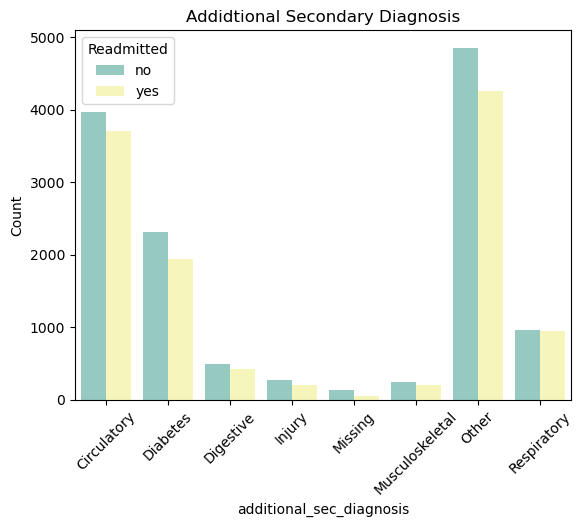

In [27]:
sns.countplot(data=df, x="additional_sec_diagnosis", palette="Set3", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('Addidtional Secondary Diagnosis')
plt.legend(title='Readmitted')
plt.xlabel('additional_sec_diagnosis')
plt.ylabel('Count')
plt.show()

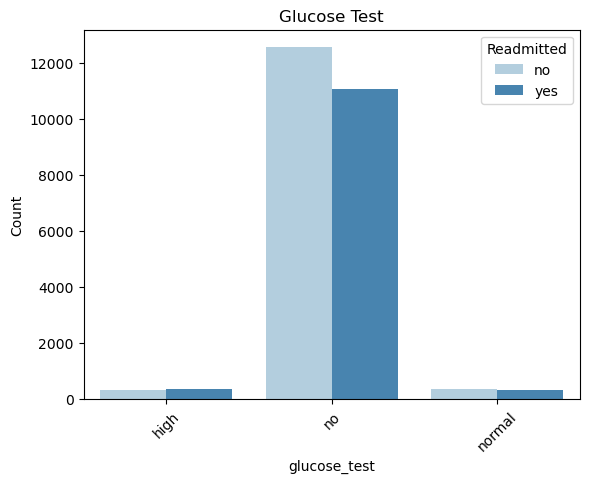

In [28]:
sns.countplot(data=df, x="glucose_test", palette="Blues", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('Glucose Test')
plt.legend(title='Readmitted')
plt.xlabel('glucose_test')
plt.ylabel('Count')
plt.show()

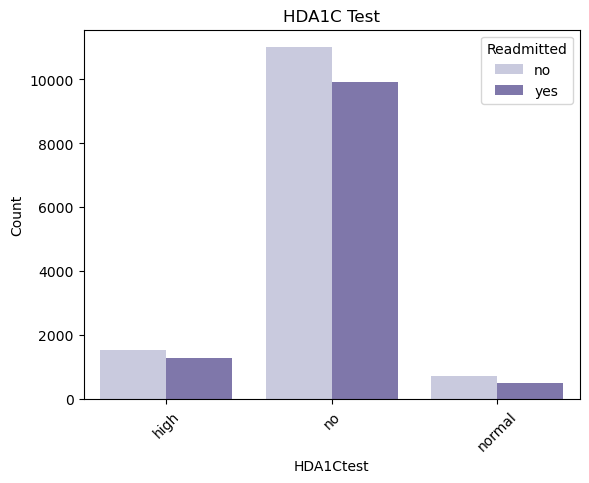

In [29]:
sns.countplot(data=df, x="HDA1Ctest", palette="Purples", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('HDA1C Test')
plt.legend(title='Readmitted')
plt.xlabel('HDA1Ctest')
plt.ylabel('Count')
plt.show()

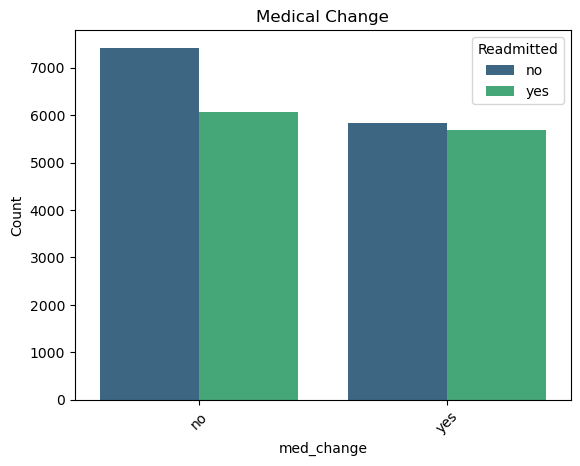

In [30]:
sns.countplot(data=df, x="med_change", palette="viridis", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('Medical Change')
plt.legend(title='Readmitted')
plt.xlabel('med_change')
plt.ylabel('Count')
plt.show()

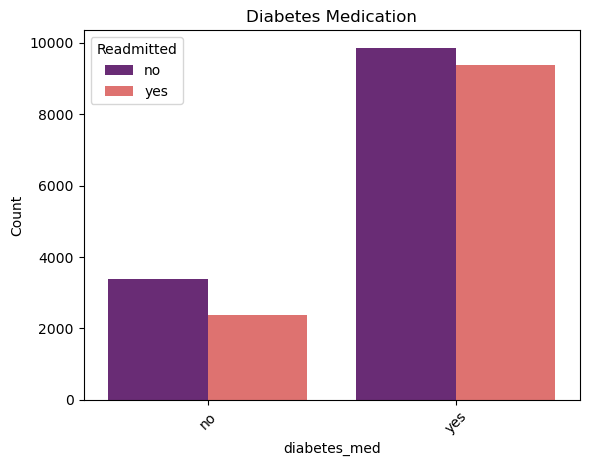

In [31]:
sns.countplot(data=df, x="diabetes_med", palette="magma", hue="readmitted" )
plt.xticks(rotation=45) 
plt.title('Diabetes Medication')
plt.legend(title='Readmitted')
plt.xlabel('diabetes_med')
plt.ylabel('Count')
plt.show()

In [32]:
readmitted_data= df[df['readmitted'] == 'yes']
readmitted_data.head()

time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
2                 5                45             0             18   
3                 2                36             0             12   
5                 2                51             0             10   
7                 1                19             6             16   
8                 4                67             3             13   

   n_outpatient  n_inpatient  n_emergency medical_specialty primary_diagnosis  \
2             0            0            0           Missing       Circulatory   
3             1            0            0           Missing       Circulatory   
5             0            0            0           Missing             Other   
7             0            0            1             Other       Circulatory   
8             0            0            0  InternalMedicine         Digestive   

  sec_diagnosis additional_sec_diagnosis glucose_test HDA1Ctest med_change  \
2   Circulatory              Circulatory           no        no        yes   
3         Other                 Diabetes           no        no        yes   
5         Other                    Other           no        no         no   
7         Other                    Other           no        no         no   
8         Other                    Other           no        no         no   

  diabetes_med readmitted         Age_Category  
2          yes        yes      late_middle_age  
3          yes        yes               senior  
5           no        yes        early_mid_age  
7          yes        yes          mid_old_age  
8           no        yes  very_senior_old_age

In [33]:
col = ["medical_specialty", "Age_Category","diabetes_med","med_change","HDA1Ctest","glucose_test","additional_sec_diagnosis","sec_diagnosis","primary_diagnosis"]
for c in col:
    print(f"\nPercentages for {c}:")
    print(readmitted_data[c].value_counts(normalize=True) * 100)


Percentages for medical_specialty:
Missing                   51.522886
InternalMedicine          13.578356
Other                      9.401055
Family/GeneralPractice     7.929216
Emergency/Trauma           7.920708
Cardiology                 5.393908
Surgery                    4.253871
Name: medical_specialty, dtype: float64

Percentages for Age_Category:
senior                 28.381827
mid_old_age            23.566445
very_senior_old_age    19.048834
late_middle_age        16.726221
early_mid_age           9.588225
centenarian             2.688446
Name: Age_Category, dtype: float64

Percentages for diabetes_med:
yes    79.69202
no     20.30798
Name: diabetes_med, dtype: float64

Percentages for med_change:
no     51.701548
yes    48.298452
Name: med_change, dtype: float64

Percentages for HDA1Ctest:
no        84.524417
high      11.051557
normal     4.424026
Name: HDA1Ctest, dtype: float64

Percentages for glucose_test:
no        94.129658
high       3.037264
normal     2.833078
Nam

In [34]:
# label encoding for column readmitted our target variable
df['readmitted_numerical']= np.where(df['readmitted']=='yes',1,0)

In [35]:
df.head()

time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0                 8                72             1             18   
1                 3                34             2             13   
2                 5                45             0             18   
3                 2                36             0             12   
4                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty primary_diagnosis  \
0             2            0            0           Missing       Circulatory   
1             0            0            0             Other             Other   
2             0            0            0           Missing       Circulatory   
3             1            0            0           Missing       Circulatory   
4             0            0            0  InternalMedicine             Other   

  sec_diagnosis additional_sec_diagnosis glucose_test HDA1Ctest med_change  \
0   Respiratory                    Other           no        no         no   
1         Other                    Other           no        no         no   
2   Circulatory              Circulatory           no        no        yes   
3         Other                 Diabetes           no        no        yes   
4   Circulatory              Respiratory           no        no         no   

  diabetes_med readmitted     Age_Category  readmitted_numerical  
0          yes         no           senior                     0  
1          yes         no           senior                     0  
2          yes        yes  late_middle_age                     1  
3          yes        yes           senior                     1  
4          yes         no      mid_old_age                     0

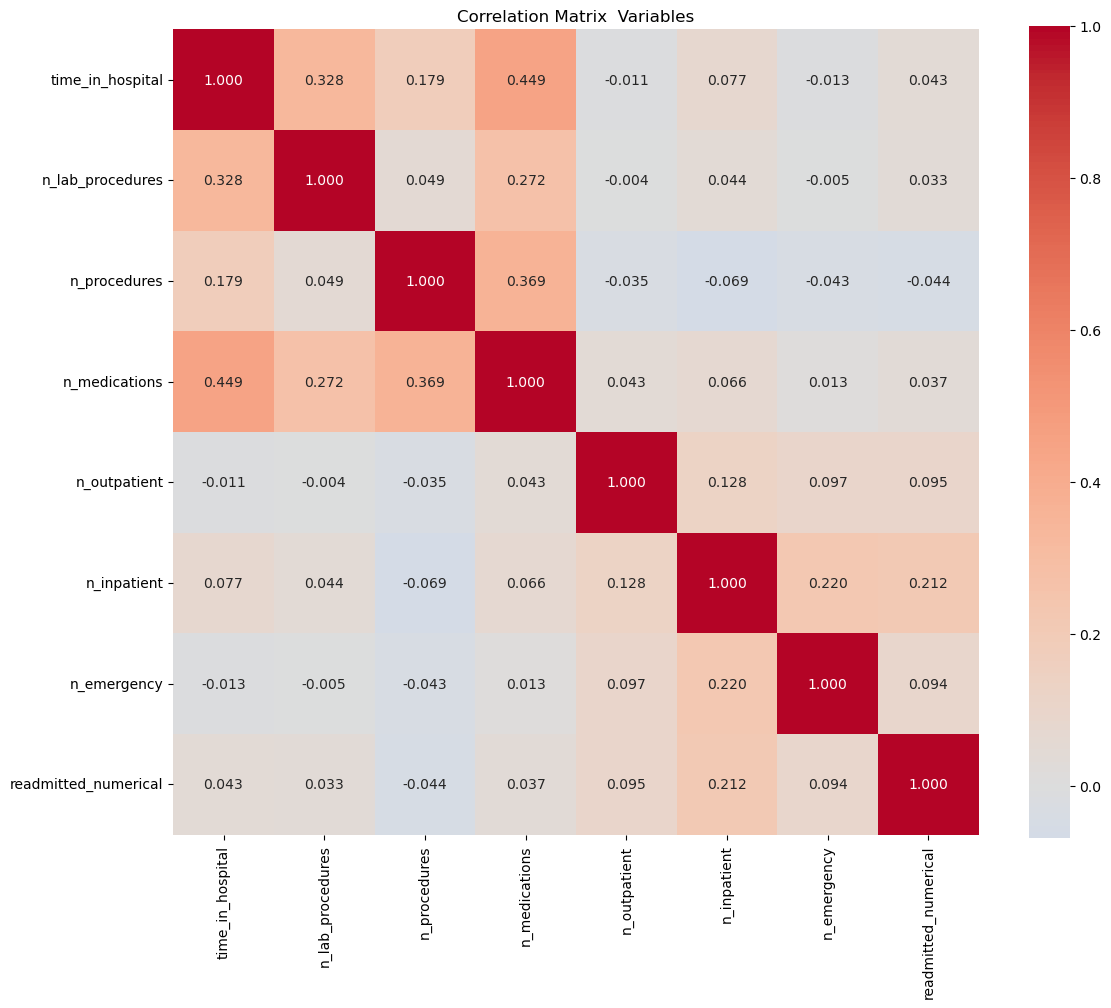

In [36]:
# Create correlation matrix, to see the realationship btn target variable and other numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Visualize with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',      
            center=0,             
            square=True,          
            fmt='.3f')           
plt.title('Correlation Matrix  Variables')
plt.tight_layout()
plt.show()

### Interpretation
- n_inpatient (0.212) - Patients with more previous inpatient visits are slightly more likely to be readmitted.
- n_outpatient (0.095) - More outpatient visits show slight correlation with readmission.
- n_emergency (0.094) - More emergency visits slightly correlate with readmission.


n_inpatient is the strongest predictor indicating that patients with history of hospitalizations are more likely to return.

#### Feature Engineering


In [38]:
# Use get_dummies encoder, have acategorical columns in numbers
df_dummies= pd.get_dummies(df.drop(['medical_specialty','readmitted'], axis=1))
df_dummies.head()

time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0                 8                72             1             18   
1                 3                34             2             13   
2                 5                45             0             18   
3                 2                36             0             12   
4                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency  readmitted_numerical  \
0             2            0            0                     0   
1             0            0            0                     0   
2             0            0            0                     1   
3             1            0            0                     1   
4             0            0            0                     0   

   primary_diagnosis_Circulatory  primary_diagnosis_Diabetes  ...  \
0                              1                           0  ...   
1                              0                           0  ...   
2                              1                           0  ...   
3                              1                           0  ...   
4                              0                           0  ...   

   med_change_no  med_change_yes  diabetes_med_no  diabetes_med_yes  \
0              1               0                0                 1   
1              1               0                0                 1   
2              0               1                0                 1   
3              0               1                0                 1   
4              1               0                0                 1   

   Age_Category_centenarian  Age_Category_early_mid_age  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   Age_Category_late_middle_age  Age_Category_mid_old_age  \
0                             0                         0   
1                             0                         0   
2                             1                         0   
3                             0                         0   
4                             0                         1   

   Age_Category_senior  Age_Category_very_senior_old_age  
0                    1                                 0  
1                    1                                 0  
2                    0                                 0  
3                    1                                 0  
4                    0                                 0  

[5 rows x 48 columns]

<Axes: >

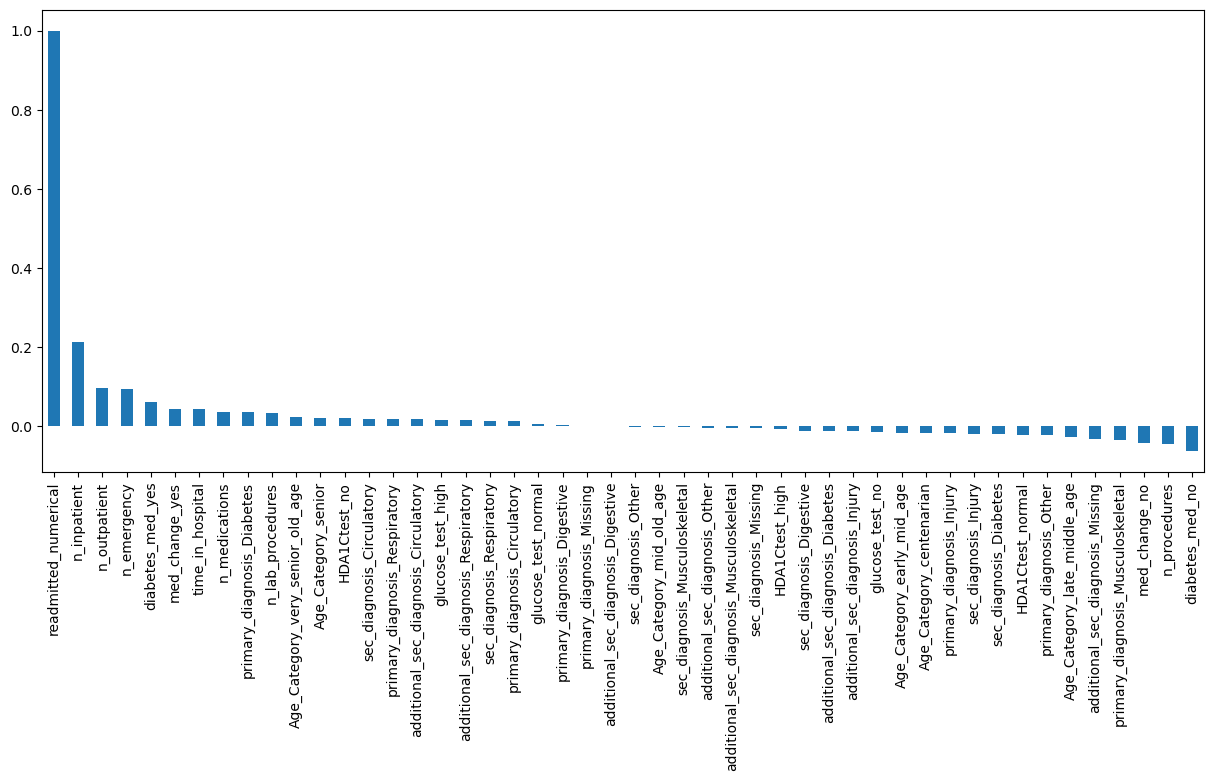

In [41]:
plt.figure(figsize=(15,6))
df_dummies.corr()['readmitted_numerical'].sort_values(ascending=False).plot(kind= 'bar')

### Bivariate Analysis

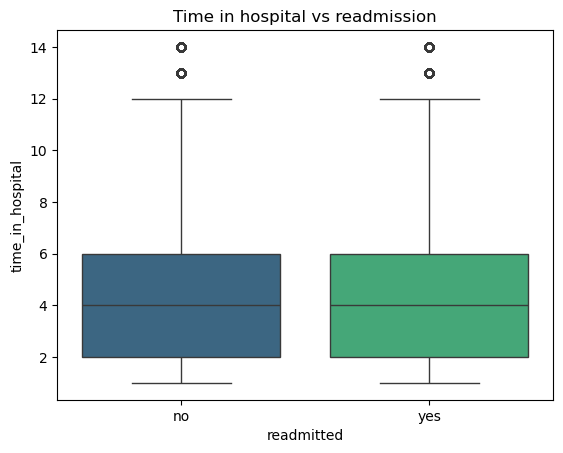

In [44]:
sns.boxplot(data =df, x='readmitted',y= 'time_in_hospital', palette='viridis', hue='readmitted', legend=False)
plt.title('Time in hospital vs readmission')
plt.show()

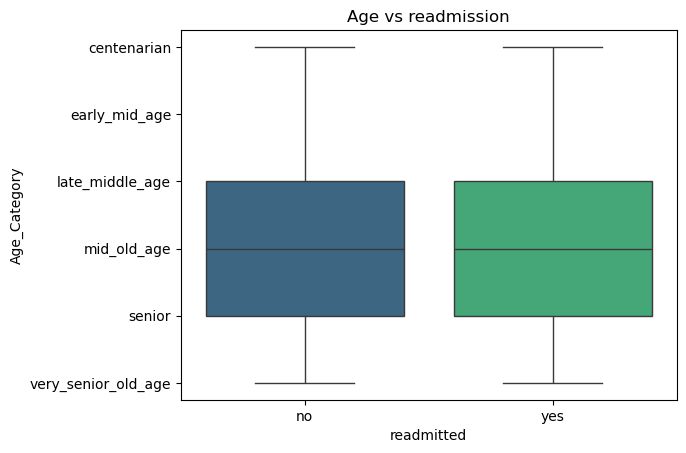

In [45]:
sns.boxplot(data =df, x='readmitted',y= 'Age_Category', palette='viridis', hue='readmitted', legend=False)
plt.title('Age vs readmission')
plt.show()

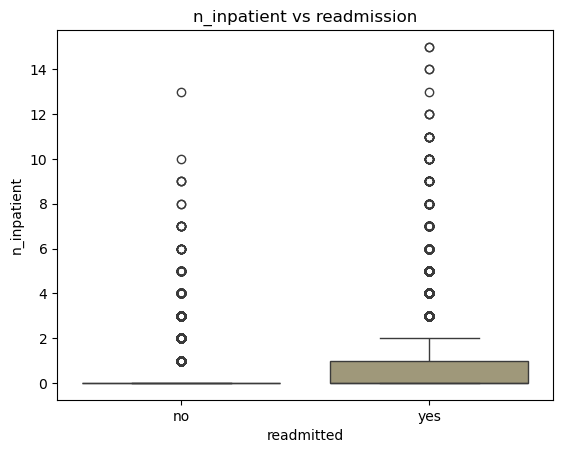

In [48]:
sns.boxplot(data =df, x='readmitted',y= 'n_inpatient', palette='cividis', hue='readmitted', legend=False)
plt.title('n_inpatient vs readmission')
plt.show()

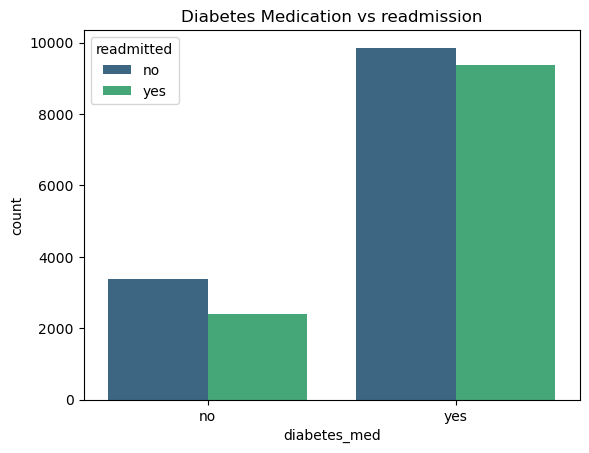

In [51]:
sns.countplot(data =df, x= 'diabetes_med', palette='viridis', hue='readmitted')
plt.title('Diabetes Medication vs readmission')
plt.show()